In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#list of all the csv files
co_list = ["AAPL_data.csv","AMZN_data.csv","GOOG_data.csv","MSFT_data.csv"]

In [4]:
#concatinating all the csv files together
path = r"C:\Users\dell\Desktop\ML\Data analysis UDemy"

data = pd.DataFrame()

for file in co_list:
    current = pd.read_csv(path + "/" + file)
    data = pd.concat([data,current])

In [5]:
data.shape

(4752, 7)

In [6]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [8]:
#information about the data frame created
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 297.0+ KB


In [9]:
#converting the date column to date time
data["date"] = pd.to_datetime(data["date"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 297.0+ KB


In [12]:
#list of all the unique company names
co_name = data["Name"].unique()

In [20]:
import warnings
warnings.filterwarnings("ignore")

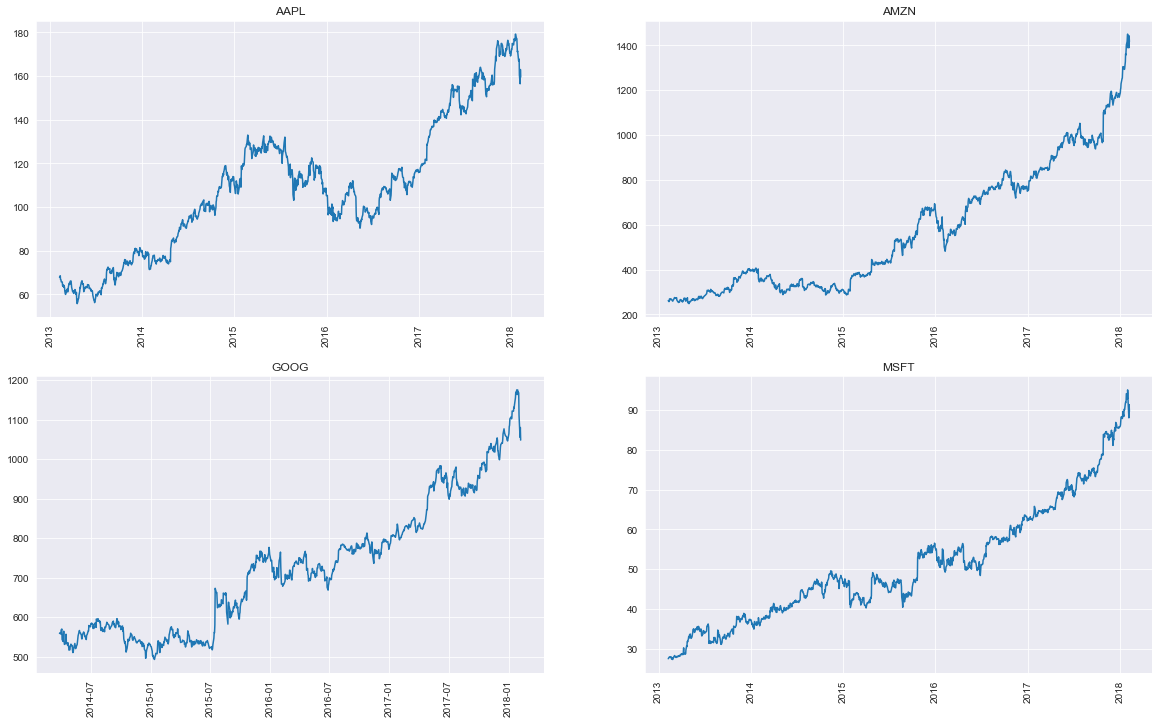

In [24]:
#analyzing the closing of the companies
sns.set_style("darkgrid")
plt.figure(figsize=(20,12))
for i,co in enumerate(co_name,1):
    plt.subplot(2,2,i)
    df = data[data["Name"] == co]
    plt.plot(df["date"],df["close"])
    plt.xticks(rotation="vertical")
    plt.title(co)

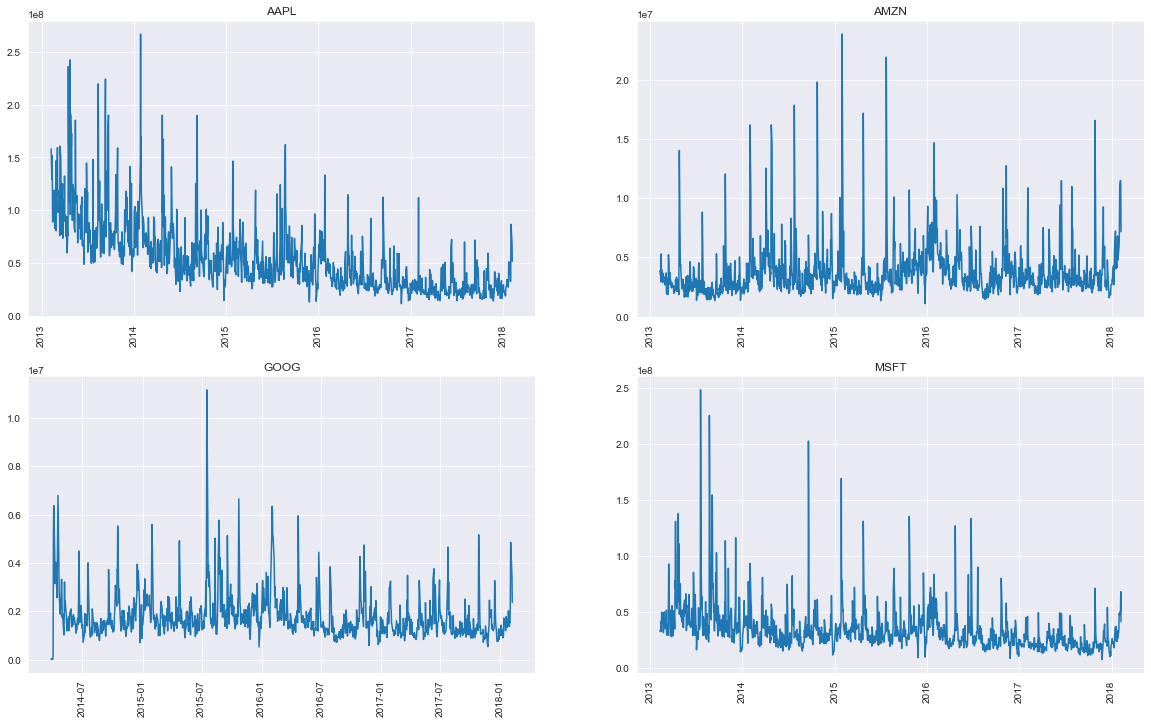

In [25]:
#analysing the volume of the companies
sns.set_style("darkgrid")
plt.figure(figsize=(20,12))
for i,co in enumerate(co_name,1):
    plt.subplot(2,2,i)
    df = data[data["Name"] == co]
    plt.plot(df["date"],df["volume"])
    plt.xticks(rotation="vertical")
    plt.title(co)

In [26]:
#featuring the daily price change column
data["daily_price_change"] = data["close"]-data["open"]

In [27]:
data.sample(5)

,date,open,high,low,close,volume,Name,daily_price_change
543,2015-04-08,374.6600,381.5800,374.6500,381.2000,2636434,AMZN,6.5400
32,2013-03-27,258.7500,265.9300,257.9000,265.3000,2874824,AMZN,6.5500
442,2014-11-10,109.0200,109.3300,108.6700,108.8300,27195547,AAPL,-0.1900
897,2016-08-31,766.6000,769.6400,764.0000,769.1600,1633789,AMZN,2.5600
146,2013-09-09,72.1428,72.5599,71.9256,72.3099,84887432,AAPL,0.1671


In [28]:
#featuring the 1% change return
data["1%_change_return"] = ((data["daily_price_change"])/data["close"])*100

In [30]:
data.head()

,date,open,high,low,close,volume,Name,daily_price_change,1%_change_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


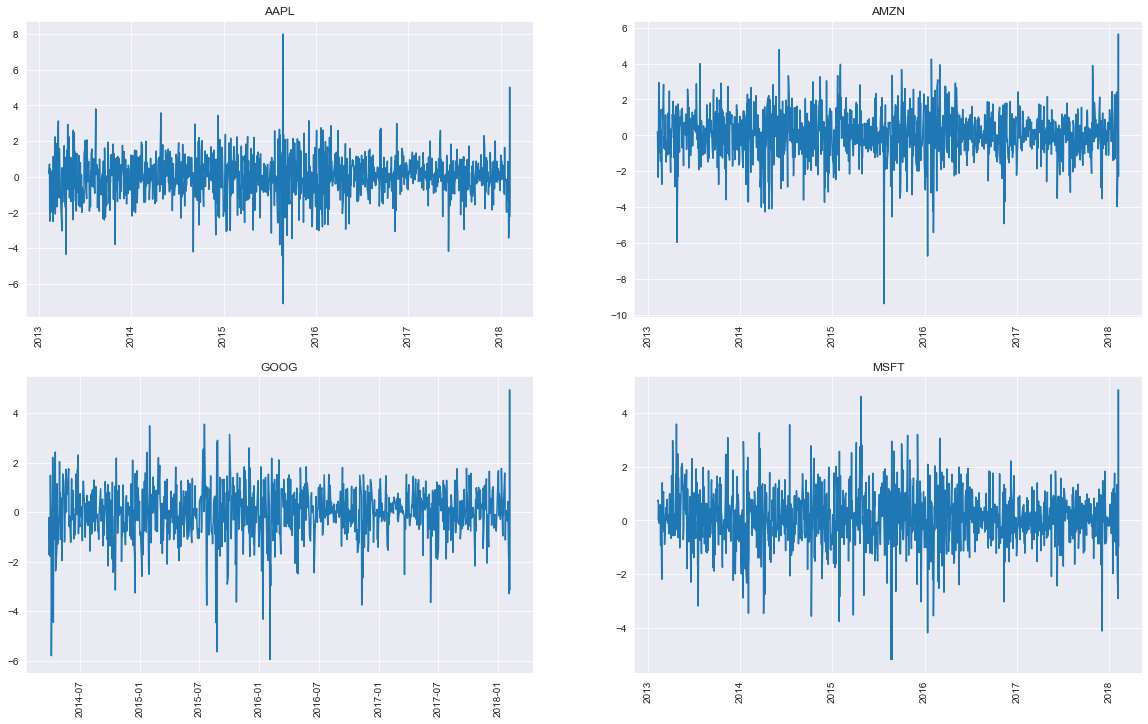

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,12))
for i,co in enumerate(co_name,1):
    plt.subplot(2,2,i)
    df = data[data["Name"] == co]
    plt.plot(df["date"],df["1%_change_return"])
    plt.xticks(rotation="vertical")
    plt.title(co)

In [32]:
# import plotly as px

In [33]:
#making a copy of data as df
df = data.copy()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4752 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4752 non-null   datetime64[ns]
 1   open                4752 non-null   float64       
 2   high                4752 non-null   float64       
 3   low                 4752 non-null   float64       
 4   close               4752 non-null   float64       
 5   volume              4752 non-null   int64         
 6   Name                4752 non-null   object        
 7   daily_price_change  4752 non-null   float64       
 8   1%_change_return    4752 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 371.2+ KB


In [36]:
#set the date column as index
df.set_index("date",inplace = True)

In [37]:
df.head()

,open,high,low,close,volume,Name,daily_price_change,1%_change_return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [38]:
#resampling to find the monthly mean of closing 
#this resampling mean is of every company not individual
df["close"].resample("M").mean()

date
2013-02-28    119.026255
2013-03-31    119.006003
2013-04-30    117.636265
2013-05-31    120.152430
2013-06-30    123.175007
                 ...    
2017-10-31    554.749773
2017-11-30    606.606190
2017-12-31    617.286125
2018-01-31    675.965476
2018-02-28    689.823500
Freq: M, Name: close, Length: 61, dtype: float64

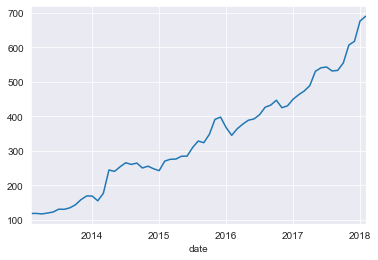

In [39]:
df["close"].resample("M").mean().plot()

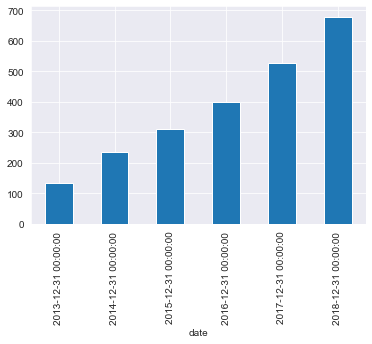

In [41]:
df["close"].resample("Y").mean().plot(kind = "bar")

In [47]:
#reading the data individually
aapl = pd.read_csv("AAPL_data.csv")
amzn = pd.read_csv("AMZN_data.csv")
goog = pd.read_csv("GOOG_data.csv")
msft = pd.read_csv("MSFT_data.csv")

In [49]:
#creating an empty data frame to store the closing data from every company data frame
close = pd.DataFrame()

In [50]:
#loading the close data
close["aapl"] = aapl["close"]
close["amzn"] = amzn["close"]
close["goog"] = goog["close"]
close["msft"] = msft["close"]

In [51]:
close.head()

,aapl,amzn,goog,msft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


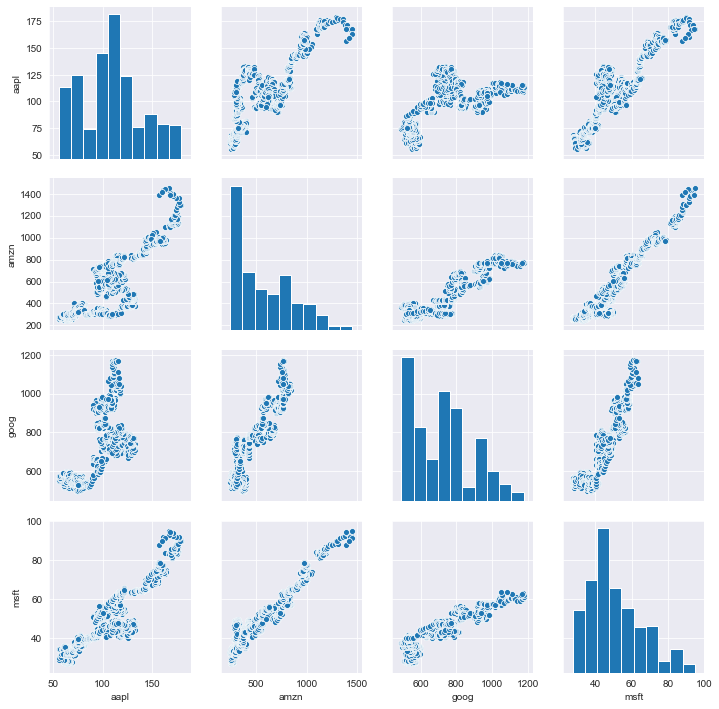

In [52]:

sns.pairplot(data = close)

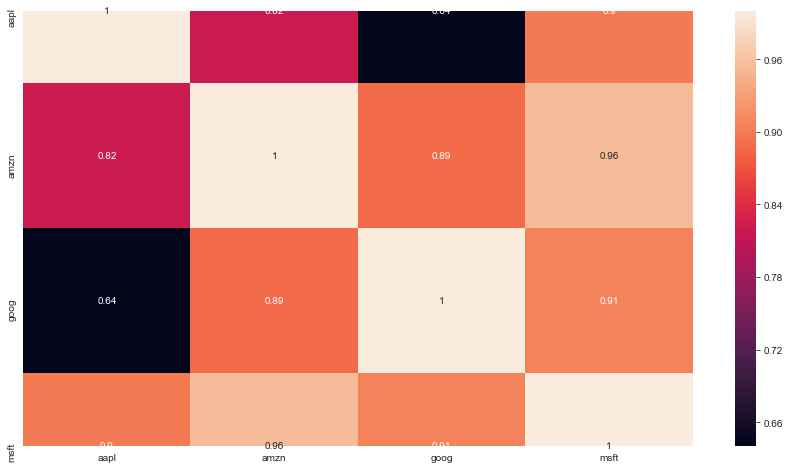

In [57]:
#corelation 
plt.figure(figsize=(15,8))
sns.heatmap(close.corr(),annot=True)